In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import interpolate

%matplotlib notebook

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
V  = np.linspace(0.1, 200, 100)
Vd = 1.2
W1 = 10
Nd = 5E18
eps = 8.85E-14*10.0
q  = 1.6E-19

W1 = (2*eps/q/Nd)**0.5

W  = W1*(V + Vd)**0.5
E  = 2*(V + Vd)**0.5 /W1
a  = 2.5*10**6*np.exp(-4*10**7/E)

<IPython.core.display.Javascript object>


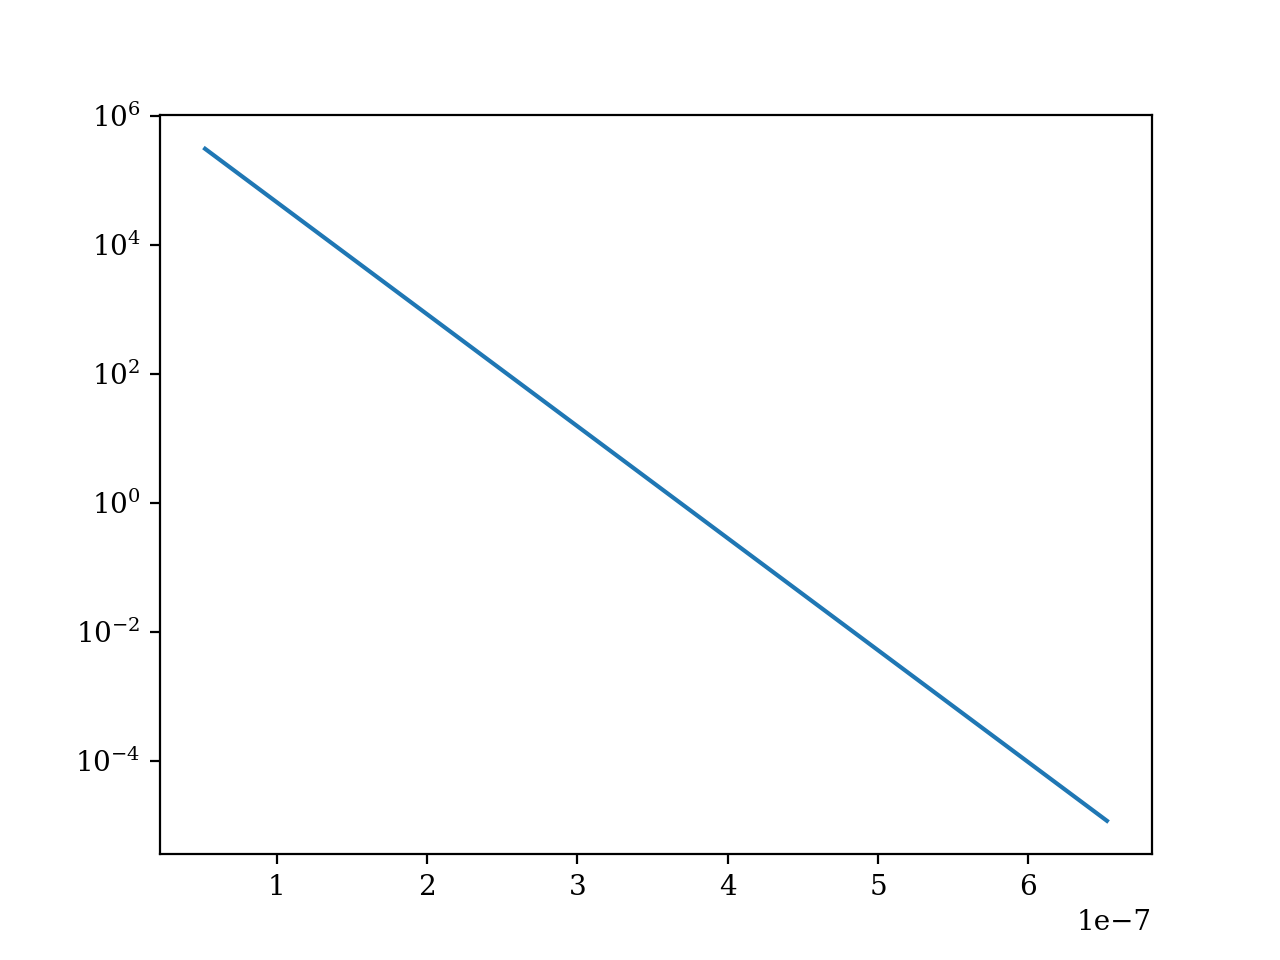

In [3]:
fig = plt.figure() 
ax  = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(1/E, a)
ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [4]:
def integrand1(x, a):
    I = []
    
    for i, _x in enumerate(x):
        temp = 0
        for j in range(0, i-1):
            temp = temp + (a[j]+a[j+1])/2*(x[j+1]-x[j])
            
        I.append(temp)
    return x, np.asarray(I)
    

In [5]:
x, y1 = integrand1(W, a)

In [6]:
def integrand2(x, y, a):
    I = []
    
    f = a*np.exp(-y)
    
    for i, _x in enumerate(x):
        temp = 0
        for j in range(0, i-1):
            temp = temp + (f[j]+f[j+1])/2*(x[j+1]-x[j])
            
        I.append(temp)
    return x, np.asarray(I)
    

In [7]:
x, y2 = integrand2(x, y1, a)

<IPython.core.display.Javascript object>


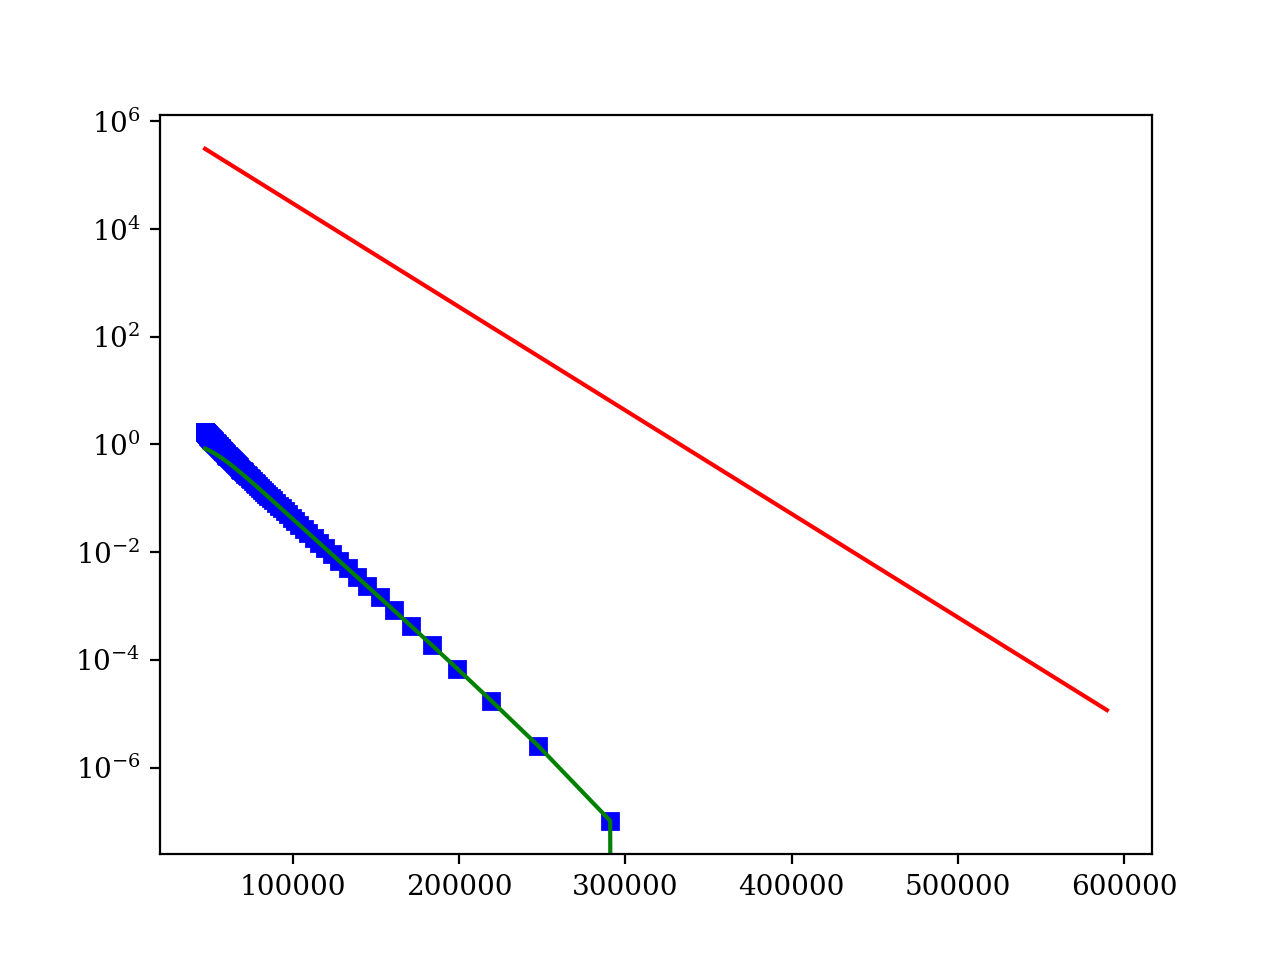

In [8]:
fig = plt.figure() 
ax  = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(1/W, a, 'r-')
ax.plot(1/x, y1, 'bs')
ax.plot(1/x, y2, 'g-')

In [9]:
M   = (1 - y2)**-1
I = 1+y2*0
In = I*(y2+1/M)/np.exp(-y1)
print('W=[%.2e, %.2e]'%(W[0], W[-1]))

W=[1.70e-06, 2.11e-05]


<IPython.core.display.Javascript object>


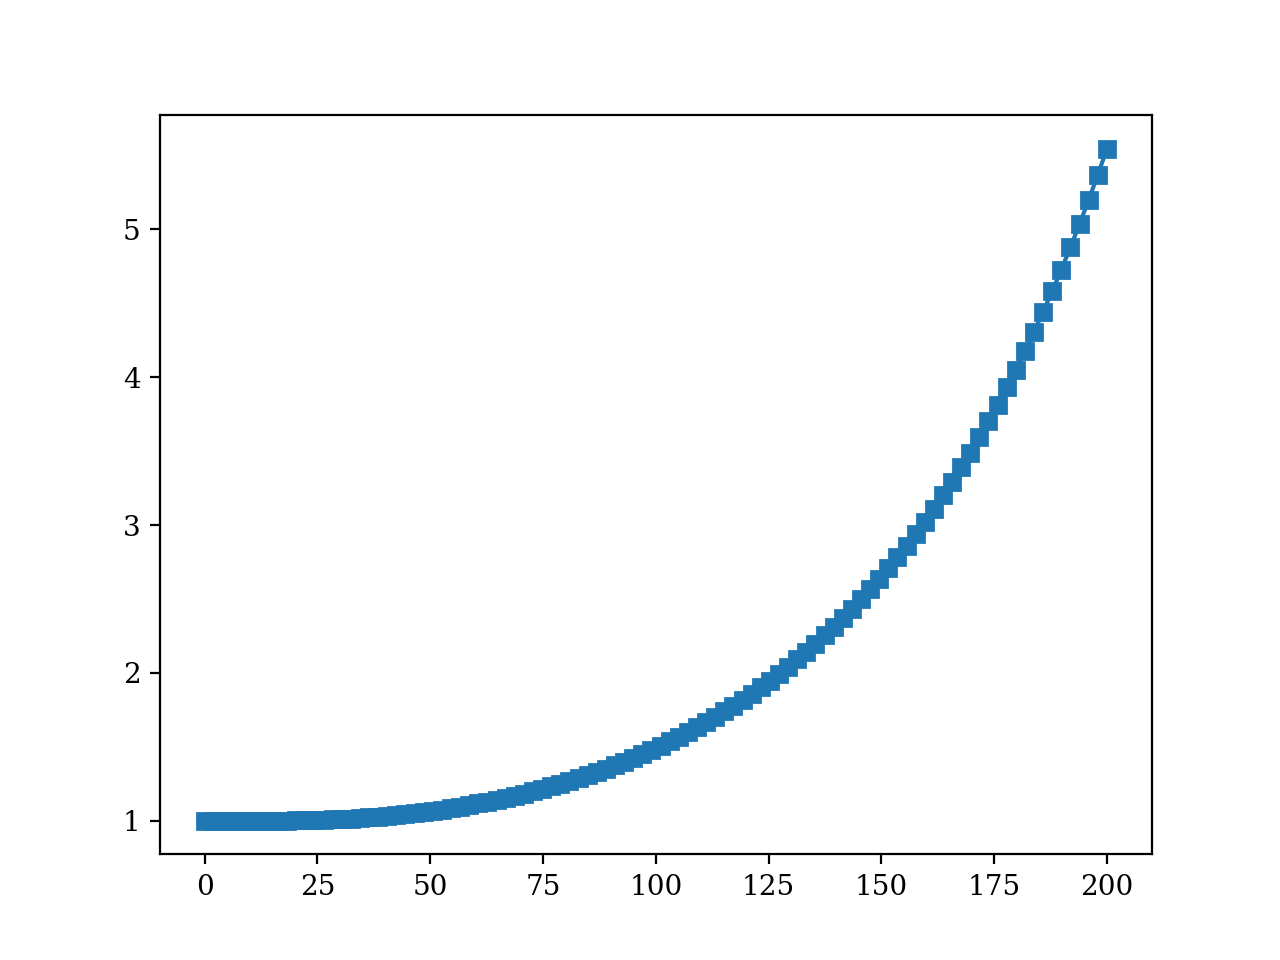

In [10]:
fig = plt.figure() 
ax  = fig.add_subplot(111)
ax.plot(V, In, '-s')

<IPython.core.display.Javascript object>


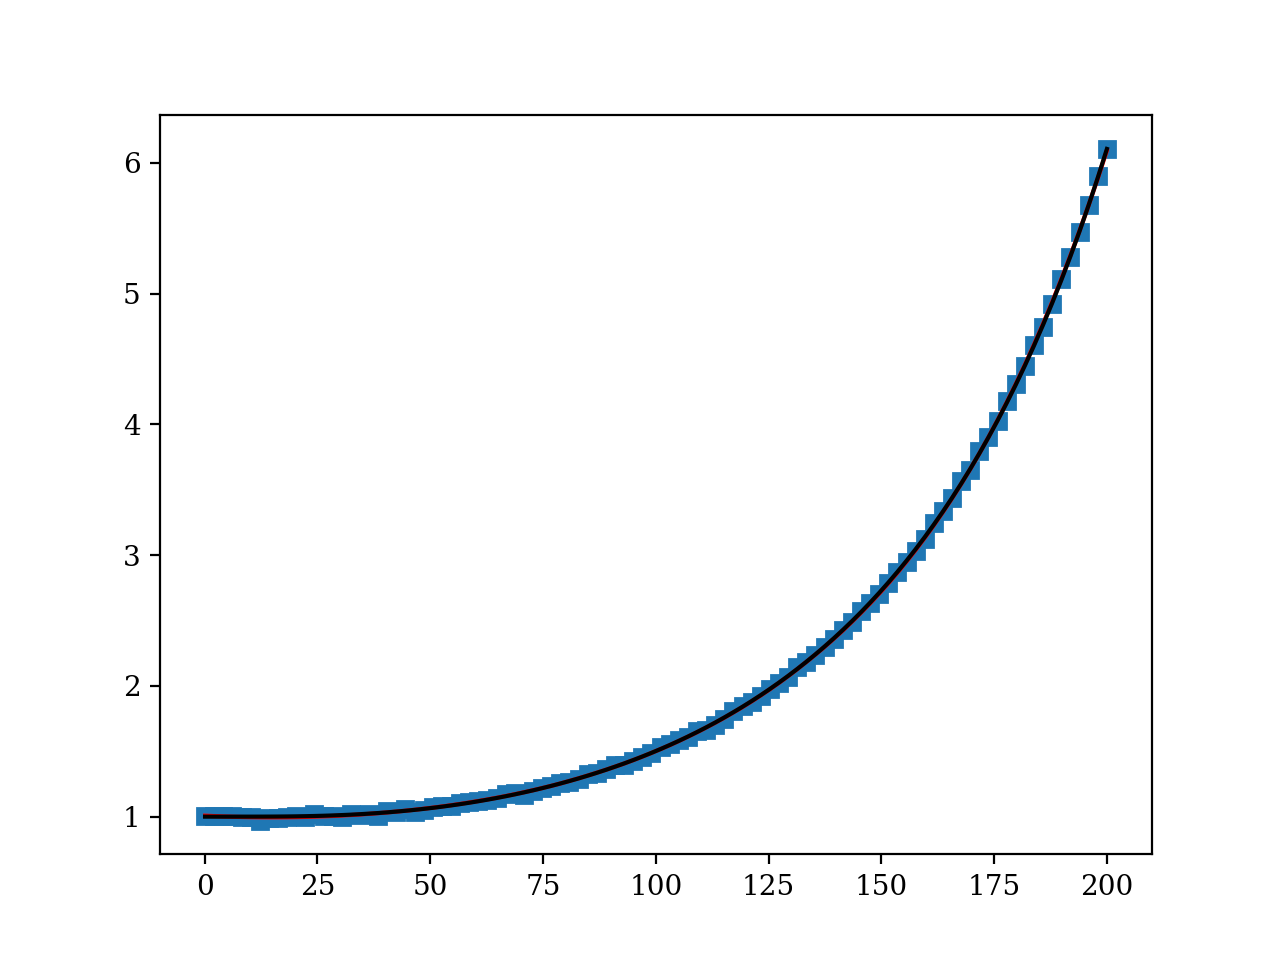

In [11]:
from scipy.signal import savgol_filter
M_n = M + np.random.normal(0, 0.01, len(M))
M_s = savgol_filter(M_n, 67, 4)
fig = plt.figure() 
ax  = fig.add_subplot(111)
ax.plot(V, M_n, 's')
ax.plot(V, M_s, 'r-')
ax.plot(V, M, 'k-')

In [12]:
a_x = np.gradient(M_s)/np.gradient(W)/M_s**2

<IPython.core.display.Javascript object>


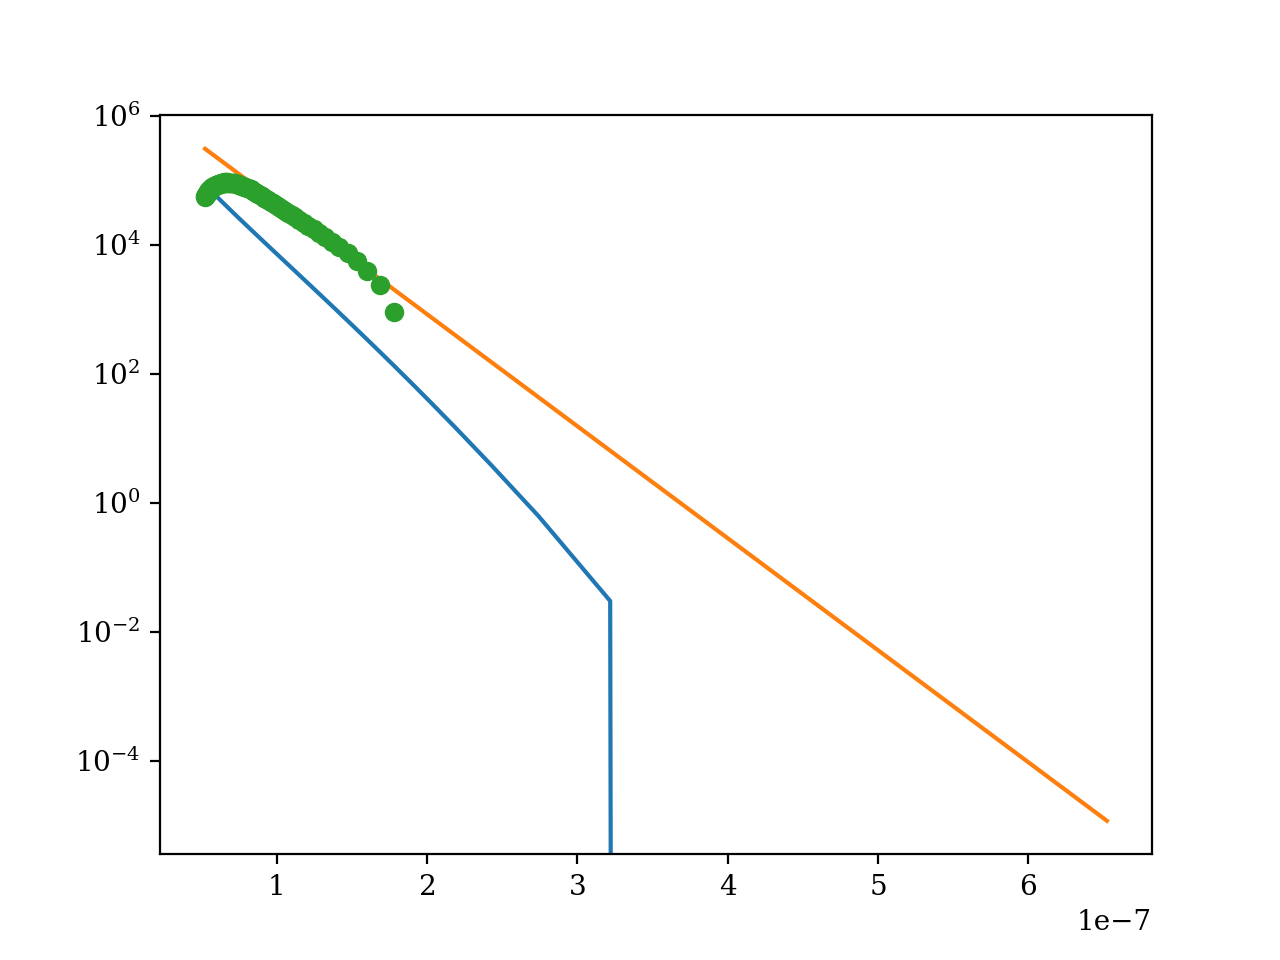

In [13]:
fig = plt.figure() 
ax  = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(1/E, np.log(M)/W)
ax.plot(1/E, a)
ax.plot(1/E, a_x, 'o')